# Data exploration and correlation analysis

## Objectives




## Inputs

outputs/datasets/collection/house_prices_records.csv

## Outputs





# Change working directory

We need to change the working directory from its current folder to its parent folder



In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices/notebooks'

We want to make the parent of the current directory the new current directory



In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory



In [3]:
current_dir = os.getcwd()
current_dir

'/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices'

## Load collected data

In [6]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [27]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8, filename=None):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        if filename:
            plt.savefig(filename, bbox_inches="tight")
            print(f"Saved: {filename}")
        plt.show()
        plt.close()

def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8, filename=None):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        if filename:
            plt.savefig(filename, bbox_inches="tight")
            print(f"Saved: {filename}")
        plt.show()
        plt.close()

def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8, output_dir='outputs/eda_images'):
    import os
    os.makedirs(output_dir, exist_ok=True)

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(
        df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot,
        filename=os.path.join(output_dir, "spearman_corr_heatmap.png")
    )

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(
        df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot,
        filename=os.path.join(output_dir, "pearson_corr_heatmap.png")
    )

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(
        df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot,
        filename=os.path.join(output_dir, "pps_heatmap.png")
    )

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)


/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices/house-prices-env-py311/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices/house-prices-env-py311/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%   75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.06  0.702




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 

Saved: outputs/eda_images/spearman_corr_heatmap.png


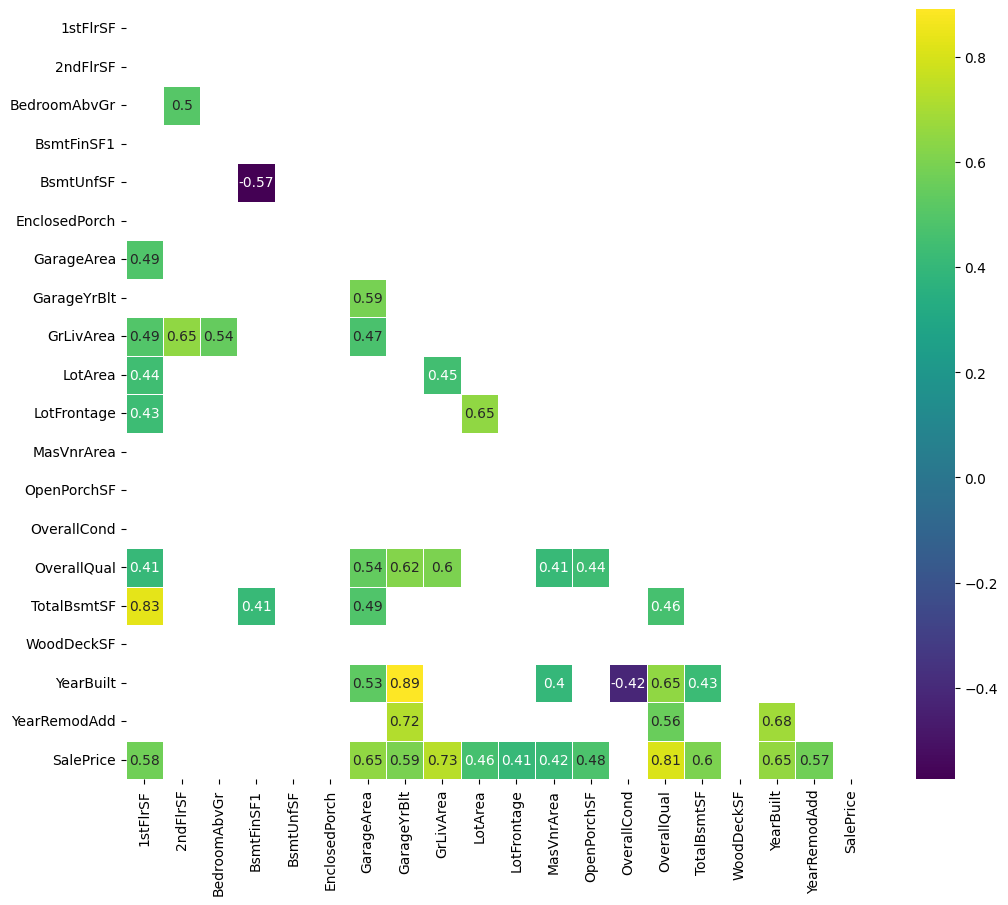



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 

Saved: outputs/eda_images/pearson_corr_heatmap.png


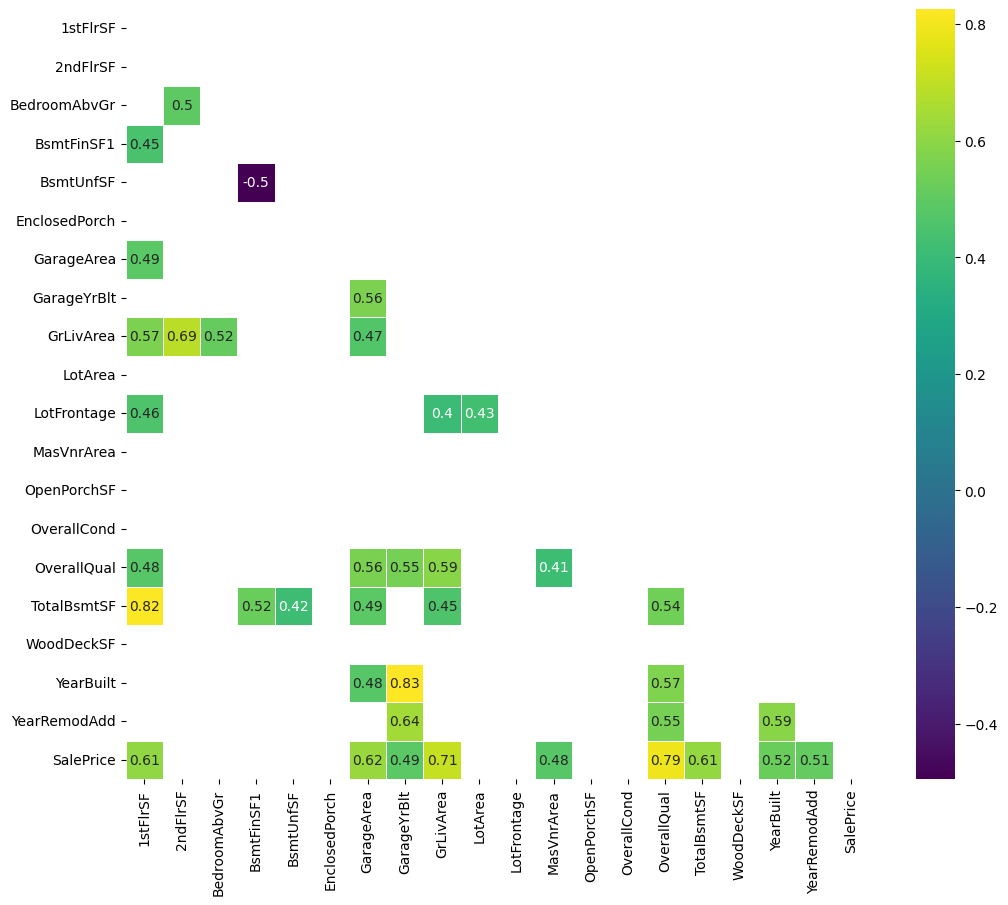



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 

Saved: outputs/eda_images/pps_heatmap.png


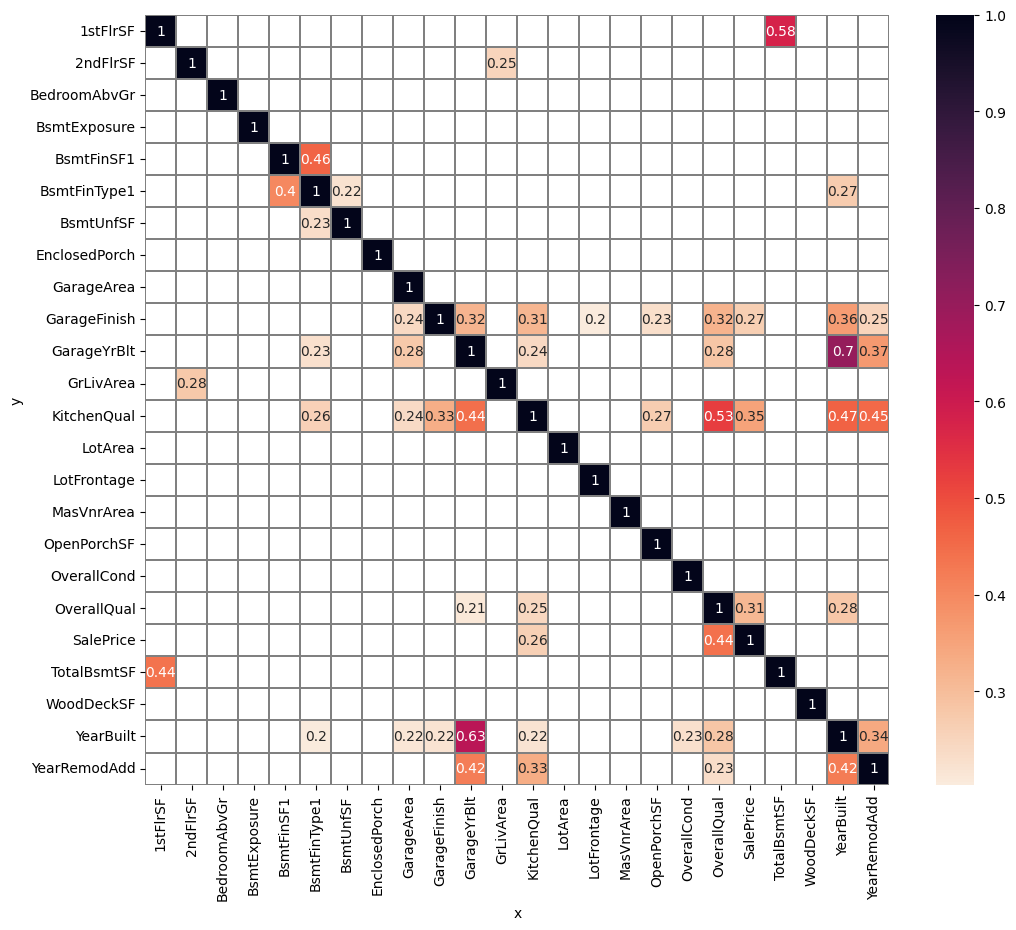

In [29]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

In [10]:
spearman_vars = ['GrLivArea', 'OverallQual', 'GarageArea', 'GarageYrBlt', 'YearBuilt']
pearson_vars = ['GrLivArea', 'OverallQual', '1stFlrSF', 'GarageArea', 'TotalBsmtSF']
pps_vars = ['OverallQual', 'KitchenQual']

# Combine all and remove duplicates
important_vars = list(set(spearman_vars + pearson_vars + pps_vars))
print("Variables selected for plotting:", important_vars)

Variables selected for plotting: ['GarageArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt', 'KitchenQual', '1stFlrSF', 'GrLivArea', 'GarageYrBlt']


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def plot_important_vars_and_save(df, variables, target='SalePrice', output_dir='outputs/eda_images'):
    os.makedirs(output_dir, exist_ok=True)
    for var in variables:
        if var not in df.columns:
            print(f"Warning: {var} not in DataFrame columns, skipping.")
            continue
        plt.figure(figsize=(6, 4))
        try:
            if pd.api.types.is_numeric_dtype(df[var]):
                sns.scatterplot(data=df, x=var, y=target)
                plt.title(f'{var} vs {target} (Numerical)', fontsize=10)
            else:
                sns.boxplot(data=df, x=var, y=target)
                plt.title(f'{var} vs {target} (Categorical)', fontsize=10)
            plt.tight_layout()
            filename = f"{var}_vs_{target}.png".replace('/', '_')
            plt.savefig(os.path.join(output_dir, filename), bbox_inches="tight")
            plt.show()  # <-- This will display the plot in the notebook
            print(f"Saved: {filename}")
        except Exception as e:
            print(f"Error plotting {var}: {e}")
        finally:
            plt.close()

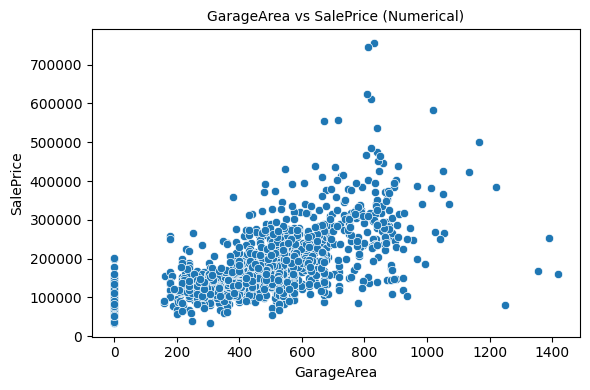

Saved: GarageArea_vs_SalePrice.png


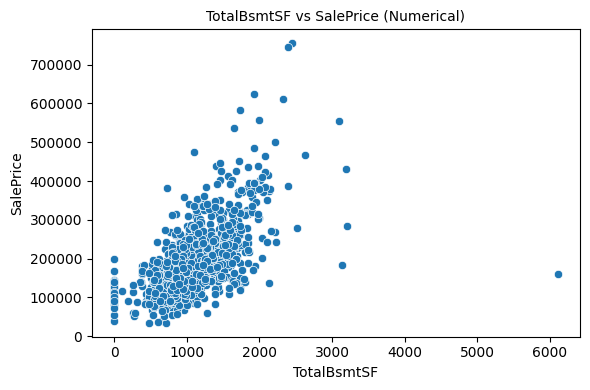

Saved: TotalBsmtSF_vs_SalePrice.png


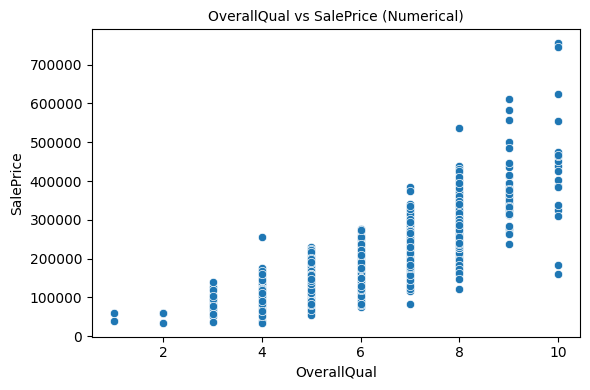

Saved: OverallQual_vs_SalePrice.png


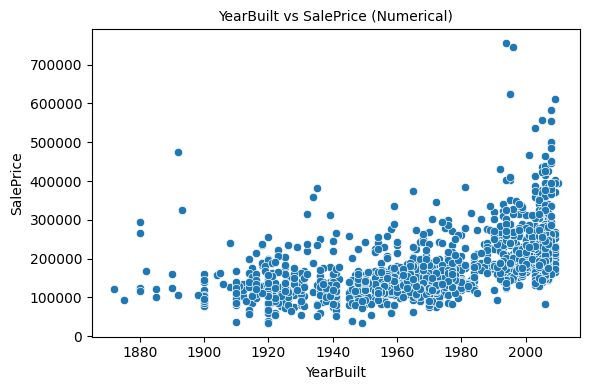

Saved: YearBuilt_vs_SalePrice.png


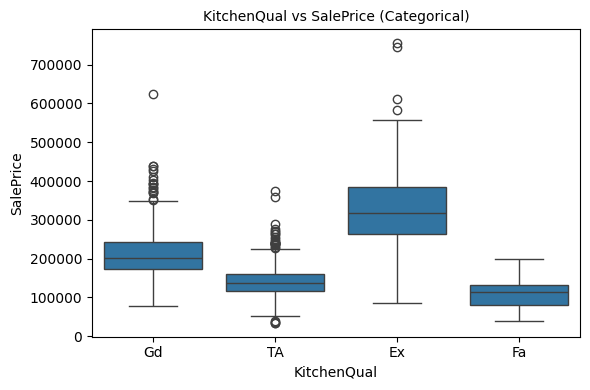

Saved: KitchenQual_vs_SalePrice.png


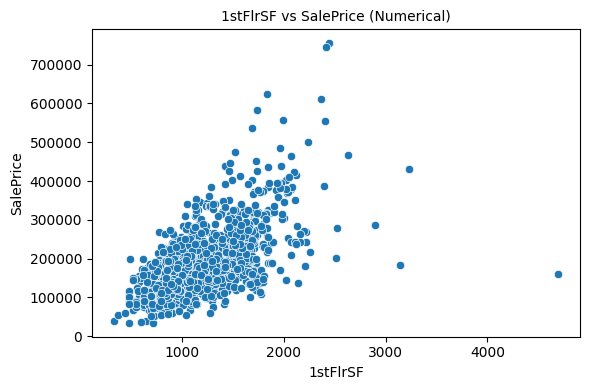

Saved: 1stFlrSF_vs_SalePrice.png


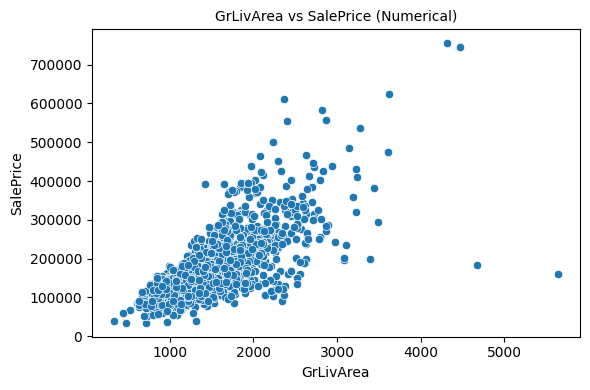

Saved: GrLivArea_vs_SalePrice.png


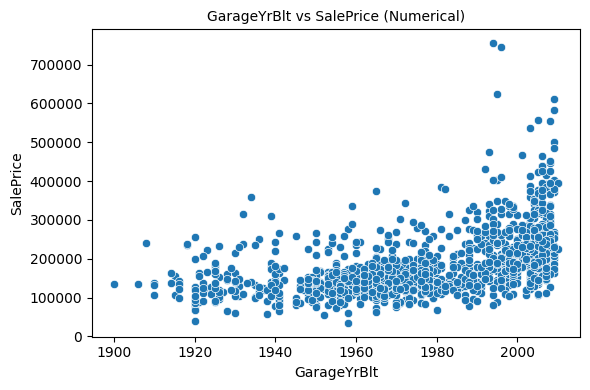

Saved: GarageYrBlt_vs_SalePrice.png


In [26]:
plot_important_vars_and_save(df, important_vars)

## Feature vs. Target Analysis

This section provides an analytical summary of the relationship between selected features and the target variable `SalePrice`, based on visual inspection of scatter plots for numerical variables and a box plot for categorical variables.

### Numerical Features

#### GrLivArea (Above Ground Living Area)
A strong positive linear relationship is observed between `GrLivArea` and `SalePrice`. Larger living areas are associated with higher sale prices. Several high-leverage points are visible, which may be considered outliers and require further investigation.

#### GarageArea
`GarageArea` displays a moderate positive correlation with `SalePrice`. While the trend is generally upward, the dispersion increases for larger garage areas.

#### TotalBsmtSF and 1stFlrSF
Both `TotalBsmtSF` and `1stFlrSF` show positive linear trends with `SalePrice`. The correlation is notable, although not as strong as with `GrLivArea`. These features are likely to contribute significantly to the predictive model.

#### YearBuilt
The plot of `YearBuilt` against `SalePrice` indicates that newer properties tend to have higher sale prices. There is a visible upward trend for houses built after the 1980s. The relationship is not strictly linear, suggesting the need for further transformation or binning.

#### GarageYrBlt
The distribution of `GarageYrBlt` includes implausible values around zero, which likely represent missing or incorrectly entered data. Despite this, a positive trend is evident for valid years, particularly for newer construction.

#### OverallQual
`OverallQual` demonstrates a strong monotonic relationship with `SalePrice`, with each incremental increase in quality associated with a substantial increase in price. The variable appears ordinal but behaves almost like a continuous variable in terms of its impact on the target.

### Categorical Features

#### KitchenQual (Kitchen Quality)
`KitchenQual` exhibits a clear stratification of `SalePrice` across quality levels. Higher quality levels (e.g., `Ex`, `Gd`) correspond to higher median sale prices, whereas lower levels (`TA`, `Fa`) are associated with lower prices. This feature is expected to be a strong categorical predictor in the modeling process.

---

## Summary

- Variables with the strongest association to `SalePrice` include `GrLivArea`, `OverallQual`, `KitchenQual`, and `YearBuilt`.
- Moderate predictors include `GarageArea`, `1stFlrSF`, and `TotalBsmtSF`.
- `GarageYrBlt` may contain data quality issues and requires preprocessing.
- Outliers are present in several numerical variables and should be addressed before model training.

These insights will inform variable selection, transformation, and preprocessing strategies for subsequent modeling stages.

## Data Cleaning Note

The current analysis is based on raw data and serves as an initial assessment of variable relationships with the target variable `SalePrice`. Several features contain missing values or potential outliers, which may affect correlation strength and model reliability.

A full data cleaning process is still required. This will include handling missing values and correcting  entries. After cleaning, a second round of exploratory analysis and correlation assessment will be conducted.

